# 1. Linear Regression 1 Variabel

Di sini saya akan mencontohkan penerapan linear regression 1 variabel untuk memprediksi harga suatu rumah

<font color='red'>y</font> = <font color='blue'>m</font>x + <font color='green'>b</font> 

<font color='red'>y</font> = nilai yang ingin ditebak (harga) <br>
<font color='blue'>m</font> = koefisien/gradient <br>
x = variabel independen yang menentukan besarnya y (area) <br>
<font color='green'>b</font> = intercept (nilai yang akan mendekatkan y ke nilai terakurat) <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_excel('homeprices.xlsx')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


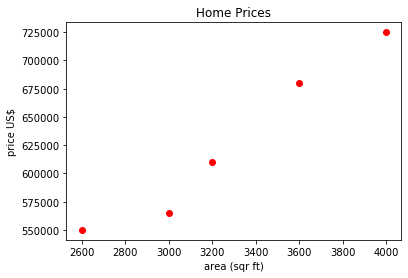

In [3]:
%matplotlib inline
plt.title('Home Prices')
plt.xlabel('area (sqr ft)')
plt.ylabel('price US$')
plt.scatter(df.area, df.price, color='red')
plt.show()

In [30]:
# Membuat linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price) # fit berfungsi untuk training linear regression model
                                # 'area' adalah nilai variabel independen yang sudah diketahui, 
                                # dan df.price adalah yang akan ditebah

LinearRegression()

In [5]:
# memprediksi harga rumah yang luasnya 3300 sqr ft
reg.predict([[3300]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

setelah kita prediksi rumah dengan luas 3300 sqr ft harganya adalah 628715.75342466$

In [6]:
# mencari koefisiennya (m)
reg.coef_

array([135.78767123])

In [7]:
# mencari interceptnya (b)
reg.intercept_

180616.43835616432

In [8]:
# mengecek apakah hasilnya sesuai
m = reg.coef_ # 135.78767123
x = 3300 
b = reg.intercept_ # 180616.43835616432
y = m*x+b
y

array([628715.75342466])

In [9]:
# memprediksi harga dengan area yang ada pada file area.csv
d = pd.read_csv('area.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [10]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [11]:
d['price'] = p

In [12]:
d.to_csv('prediction.csv', index=False)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


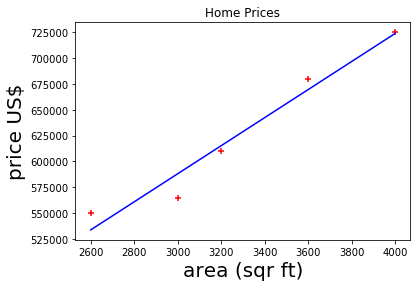

In [13]:
# menggambar garis persamaan regresinya
%matplotlib inline
plt.title('Home Prices')
plt.xlabel('area (sqr ft)', fontsize=20)
plt.ylabel('price US$', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.show()

### Latihan Linear Regression 1 Variabel

In [14]:
dc = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')
dc.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


prediksilah income pada tahun 2020

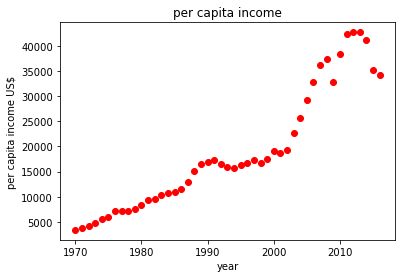

In [15]:
%matplotlib inline
plt.title('per capita income')
plt.xlabel('year')
plt.ylabel('per capita income US$')
plt.scatter(dc.year, dc['per capita income (US$)'], color='red')
plt.show()

In [16]:
incomeReg = linear_model.LinearRegression()
incomeReg.fit(dc[['year']], dc['per capita income (US$)'])

LinearRegression()

In [17]:
incomeReg.predict([[2020]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [18]:
# mencari koefisien tahun 2020
incomeReg.coef_

array([828.46507522])

In [19]:
# mencari intercept dari persamaan regresi dari per capita income
incomeReg.intercept_

-1632210.7578554575

# 2. Linear Regression dengan Banyak Variabel

Di sini saya akan mencontohkan penerapan linear regression multiple variabel untuk memprediksi harga rumah. <br>
bila pada contoh sebelumnya variabelnya hanya satu yaitu area, sekarang saya akan menggunakan 3 variabel, yaitu area/luas,banyak kamar tidur, dan usia rumah. <br>

<font color='red'>harga</font> = m1 x <font color='blue'>luas</font> + m2 x <font color='orange'>kamar tidur</font> + m3 x  <font color='green'>usia</font> + <font color='purple'>b</font> <br> 

luas, kamar tidur, dan usia adalah variabel independen yang dalam dunia machine learning sering disebut dengan features. <br>
m1, m2, dan m3 adalah koefisien. dan b adalah intercept

In [20]:
_df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


pada dataframe di atas ada data yang hilang (NaN), maka kita harus melakukan data cleaning terlebih dahulu. Untuk mengisi data yang kosong pada suatu kolom saya mencari median dari kolom tersebut kemudian memasukkan mediannya ke kolom yang kosong

In [26]:
# data cleaning
import math
median_bedrooms = math.floor(_df.bedrooms.median())
median_bedrooms

4

In [27]:
_df.bedrooms = _df.bedrooms.fillna(median_bedrooms)
_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [32]:
_reg = linear_model.LinearRegression()
_reg.fit(_df[['area', 'bedrooms', 'age']], _df.price)

LinearRegression()

In [33]:
_reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

kita dapati bahwa koefisien m1=112.06244194, m2=23388.88007794, dan m3=-3231.71790863

In [34]:
_reg.intercept_

221323.00186540396

In [36]:
# memprediksi harga rumah dengan luas 3000 sqr ft, 3 kamar tidur, dan usia 40 tahun
_reg.predict([[3000,3,40]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [37]:
# memprediksi harga rumah dengan luas 2500 sqr ft, 4 kamar tidur, dan usia 5 tahun
_reg.predict([[2500,4,5]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

### Latihan Linear Regression Banyak Variabel

dengan data yang telah diberikan prediksilah gaji dari calon karyawan dengan spesifikasi berikut : <br>
- calon karyawan dengan 2 tahun pengalaman, 9 test_score, dan 6 intervew_score <br>
- calon karyawan dengan 12 tahun pengalaman, 10 test_score, dan 10 intervew_score

In [82]:
lrmv_df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
lrmv_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [83]:
# data cleaning
lrmv_df.experience = lrmv_df.experience.fillna('zero')
test_score_mean = lrmv_df['test_score(out of 10)'].mean()
lrmv_df['test_score(out of 10)'] = lrmv_df['test_score(out of 10)'].fillna(test_score_mean)
lrmv_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [84]:
# kolom experience dirubah tipenya dari string ke number
from word2number import w2n
'''experience = []
for i in lrmv_df.experience:
    experience.append(w2n.word_to_num(i))
lrmv_df.experience = experience
'''
lrmv_df.experience = lrmv_df.experience.apply(w2n.word_to_num)
lrmv_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [85]:
hiring_reg = linear_model.LinearRegression()
hiring_reg.fit(lrmv_df[['experience','test_score(out of 10)', 'interview_score(out of 10)']], lrmv_df['salary($)'])

LinearRegression()

In [86]:
hiring_reg.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [87]:
hiring_reg.intercept_

17237.330313727187

In [88]:
# Memprediksi gaji calon karyawan dengan 2 tahun pengalaman, 9 test_score, dan 6 intervew_score 
hiring_reg.predict([[2,9,6]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [89]:
# Memprediksi gaji calon karyawan dengan 12 tahun pengalaman, 10 test_score, dan 10 intervew_score 
hiring_reg.predict([[12,10,10]])

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

Prediksi gaji calon karyawan dengan 2 tahun pengalaman, 9 test_score, dan 6 intervew_score adalah 53290.89255945 dan <br>
Prediksi gaji calon karyawan dengan 12 tahun pengalaman, 10 test_score, dan 10 intervew_score adalah 92268.07227784.